### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [159]:
data = pd.read_csv('data/coupons.csv')

In [160]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [161]:
# Get sum of all missing values
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [162]:
# Investigate car column values
data['car'].value_counts()

,count
car,
Scooter and motorcycle,22
Mazda5,22
do not drive,22
crossover,21
Car that is too old to install Onstar :D,21


In [163]:
# Removing car column as the values are mostly NaN's or not useful values
data = data.drop(columns=['car'])

In [164]:
#Drop missing data
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon?



In [165]:
# Get the proportion of coupon acceptances out of total observations
# We can see over half accepted coupons
proportion_of_acceptances = data['Y'].mean()
print(proportion_of_acceptances)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(0.5, 1.0, 'Type of Coupon and Count')

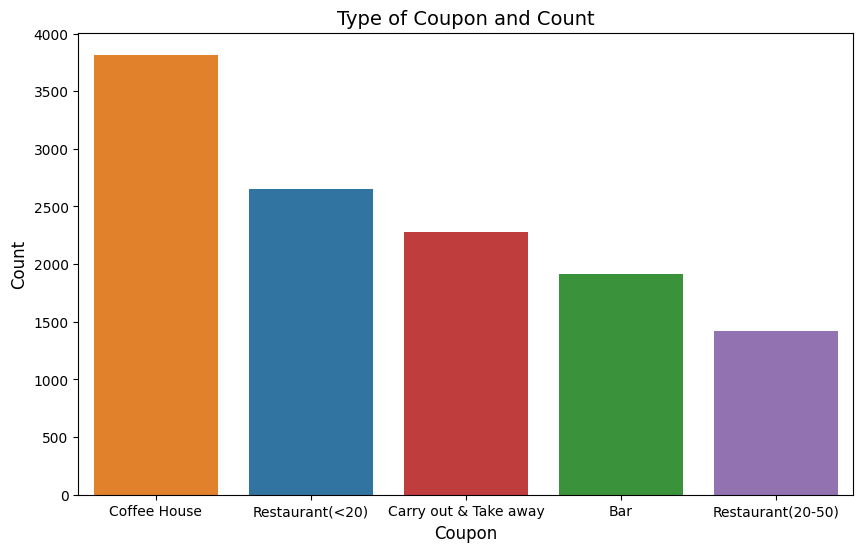

In [166]:
# Plot coupon types, ordered by count
# We can see that the most coupons offered were coffee house by a lot
count_order = data['coupon'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data, x="coupon", hue="coupon", order=count_order)
plt.xlabel("Coupon", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Type of Coupon and Count", fontsize=14)

1    Carry out & Take away
4          Restaurant(<20)
2             Coffee House
3        Restaurant(20-50)
0                      Bar
Name: coupon, dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(0.5, 1.0, 'Coupon Types and Their Acceptance Rates')

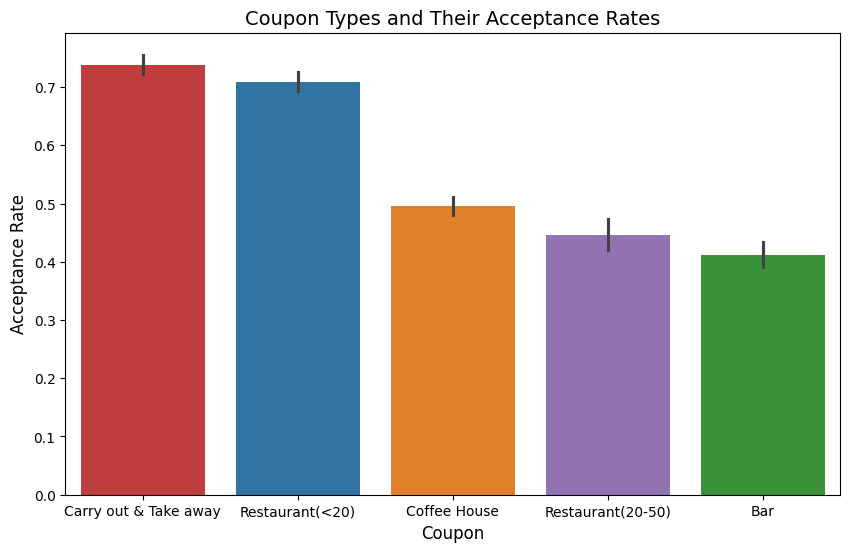

In [167]:
# Plot coupon types and the acceptance rate of each
# We can see that the highest acceptance rates were those of carry out and restaurants less than $20

acceptance_rates = data.groupby('coupon')['Y'].mean().reset_index() # Get acceptance rate of each coupon
sorted_coupons = acceptance_rates.sort_values(by='Y', ascending=False)['coupon'] # Sort the values of acceptance rates for our bar plot
print(sorted_coupons)


plt.figure(figsize=(10, 6))
sns.barplot(data, x='coupon', y='Y', hue='coupon', order=sorted_coupons)
plt.xlabel("Coupon", fontsize=12)
plt.ylabel("Acceptance Rate", fontsize=12)
plt.title("Coupon Types and Their Acceptance Rates", fontsize=14)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

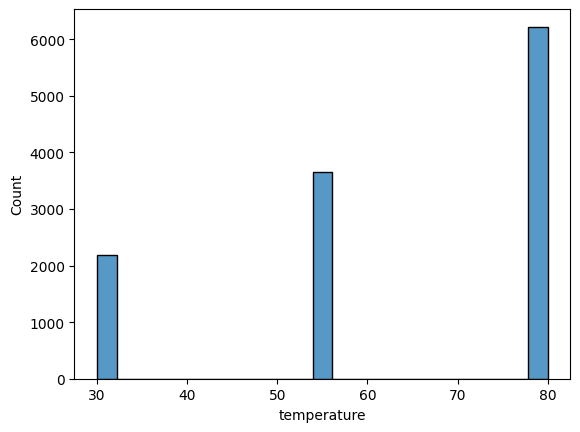

In [168]:
sns.histplot(data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [169]:
# Create DataFrame of just rows of bar coupons
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [170]:
# Get the proportion of coupon acceptances out of total observations for just bar coupons
bar_coupons_proportion = bar_coupons['Y'].mean()
print(bar_coupons_proportion)

0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [171]:
three_or_fewer = ['never', 'less1', '1~3'] # List used to query
less_bar_visits = bar_coupons.query('Bar in @three_or_fewer') # Get people who go to bar 3 or fewer times
more_bar_visits = bar_coupons.query('Bar not in @three_or_fewer') # Get people who go to bar more than 3 times

less_visits_acceptance = less_bar_visits['Y'].mean() # Get acceptance rate of those who visit 3 or less times
print(less_visits_acceptance)

more_visits_acceptance = more_bar_visits['Y'].mean() # Get acceptance rate of those who visit more than 3 times
print(more_visits_acceptance)

0.37267441860465117
0.7616580310880829


Text(0.5, 1.0, 'Acceptance Rates of Bar Coupons Based on Bar Visits')

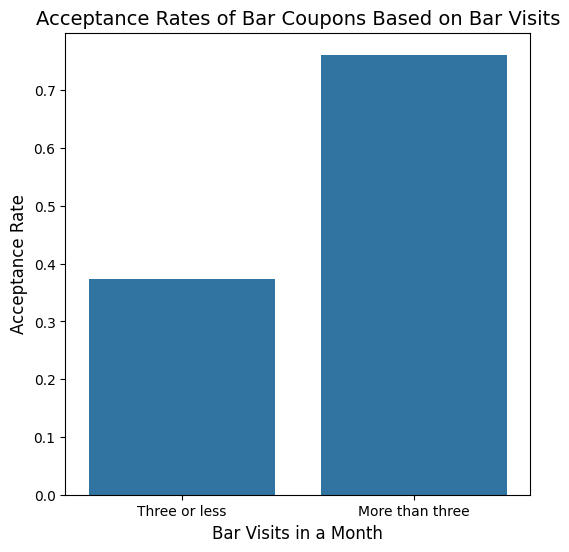

In [172]:
y = [less_visits_acceptance, more_visits_acceptance]
x = ['Three or less', 'More than three']

plt.figure(figsize=(6, 6))
sns.barplot(x=x, y=y)
plt.xlabel("Bar Visits in a Month", fontsize=12)
plt.ylabel("Acceptance Rate", fontsize=12)
plt.title("Acceptance Rates of Bar Coupons Based on Bar Visits", fontsize=14)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [173]:
more_than_one = ['1~3', '4~8', 'gt8'] # Use this list to query their bar visits

bar_coupons['age'].value_counts()
over_25 = ['26', '31', '36', '41', '46', '50plus'] # Use this list to query age

over_one_visit_25_plus = bar_coupons.query('Bar in @more_than_one and age in @over_25') # Drivers over 25 that go to the bar more than once a month
over_one_visit_25_plus_acceptance = over_one_visit_25_plus['Y'].mean() # Acceptance rate
print(over_one_visit_25_plus_acceptance)

all_others = bar_coupons.query('Bar not in @more_than_one and age not in @over_25') # Drivers that go to the bar less than once a month and under age 25
all_others_acceptance = all_others['Y'].mean() # Acceptance rate
print(all_others_acceptance)

0.6898263027295285
0.3883495145631068


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [174]:
farming = ['Farming Fishing & Forestry']
kids_and_alone = ['Alone', 'Kid(s)'] # Used to filter out drivers who were alone or had kids in the car

no_kids = bar_coupons.query('Bar in @more_than_one and passanger not in @kids_and_alone and occupation not in @farming') # Get the drivers who were not alone or had kids in the car and didn't work in farming
no_kids_acceptance = no_kids['Y'].mean()
print(no_kids_acceptance)

kids_and_over_one = bar_coupons.query('Bar in @more_than_one and passanger == "Kid(s)"') # Get drivers had kids in the car
kids_and_over_one_acceptance = kids_and_over_one['Y'].mean()
print(kids_and_over_one_acceptance)

alone_and_over_one = bar_coupons.query('Bar in @more_than_one and passanger == "Alone"') # Get drivers who were alone
alone_and_over_one_acceptance = alone_and_over_one['Y'].mean()
print(alone_and_over_one_acceptance)



0.7142857142857143
0.38095238095238093
0.7067448680351907


Text(0.5, 1.0, 'Acceptance Rates of Bar Coupons Based on Passengers')

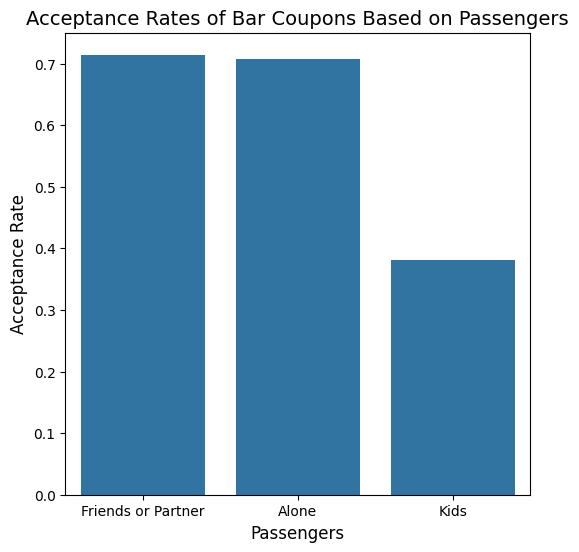

In [175]:
y = [no_kids_acceptance, alone_and_over_one_acceptance, kids_and_over_one_acceptance]
x = ['Friends or Partner', 'Alone', 'Kids']

plt.figure(figsize=(6, 6))
sns.barplot(x=x, y=y)
plt.xlabel("Passengers", fontsize=12)
plt.ylabel("Acceptance Rate", fontsize=12)
plt.title("Acceptance Rates of Bar Coupons Based on Passengers", fontsize=14)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [176]:
friends_or_partner = bar_coupons.query('Bar in @more_than_one and passanger not in @kids_and_alone and maritalStatus != "Widowed"')
friends_or_partner_acceptance = friends_or_partner['Y'].mean()
print(friends_or_partner_acceptance)

less_than_30 = ['21', '26', 'below21']
age_under_30 = bar_coupons.query('Bar in @more_than_one and age in @less_than_30')
age_under_30_acceptance = age_under_30['Y'].mean()
print(age_under_30_acceptance)

restaurant_over_4 = ['4~8', 'gt8']
income_less_than_50 = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
restaurant_and_income = bar_coupons.query('RestaurantLessThan20 in @restaurant_over_4 and income in @income_less_than_50')
restaurant_and_income_acceptance = restaurant_and_income['Y'].mean()
print(restaurant_and_income_acceptance)

0.7142857142857143
0.7195121951219512
0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations we can conclude that out of all the coupon types, bar coupons were the least accepted. Of these bar coupons, those who frequent bars more than 3 times a month were much more likely to accept the coupon than those who went less than 3 times a month (76.1% to 37.2%). Drivers who go more than once a month and over the age of 25 were more likely to accept the coupon than those under 25 that visit bars less than once a month. The drivers were also much more likely to accept the coupon when alone, with friends, or with their partner rather than with kids in the car.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [177]:
# Take data of just the rows of coffee house coupons
coffee_house = data[data['coupon'] == 'Coffee House']

What was the acceptance rate depending on the destination of the driver?

In [178]:
no_urgent = coffee_house.query('destination == "No Urgent Place"') # Query those who had to urgent destination
no_urgent_acceptance = no_urgent['Y'].mean()
print(no_urgent_acceptance)

home = coffee_house.query('destination == "Home"') # Query those who were headed home
home_acceptance = home['Y'].mean()
print(home_acceptance)

work = coffee_house.query('destination == "Work"') # Query those headed to work
work_acceptance = work['Y'].mean()
print(work_acceptance)

0.5781782756941062
0.36261261261261263
0.44


Text(0.5, 1.0, 'Acceptance Rates of Coffee Coupons Based on Destination')

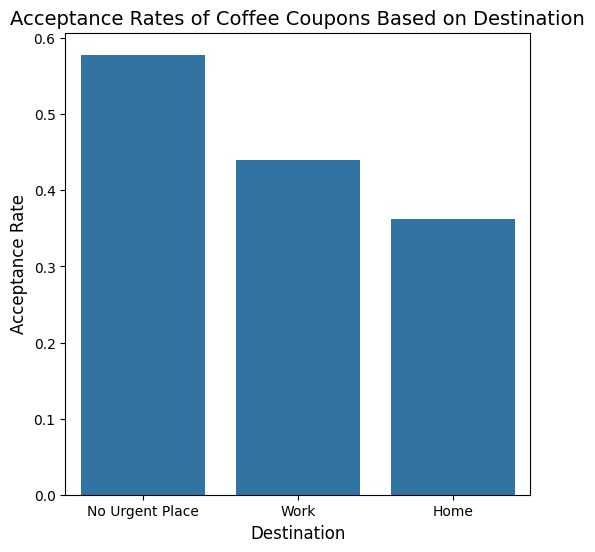

In [179]:
y = [no_urgent_acceptance, work_acceptance, home_acceptance]
x = ['No Urgent Place', 'Work', 'Home']

plt.figure(figsize=(6, 6))
sns.barplot(x=x, y=y)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Acceptance Rate", fontsize=12)
plt.title("Acceptance Rates of Coffee Coupons Based on Destination", fontsize=14)

What was the acceptance rate depending on the gender of the driver?

In [180]:
male = coffee_house.query('gender == "Male"') # Query male drivers
male_acceptance = male['Y'].mean() # Acceptance rate
print(male_acceptance)

female = coffee_house.query('gender == "Female"') # Query female drivers
female_acceptance = female['Y'].mean() # Acceptance rate
print(female_acceptance)

0.5018949648077964
0.49111223971559165


Text(0.5, 1.0, 'Acceptance Rates of Coffee Coupons Based on Gender')

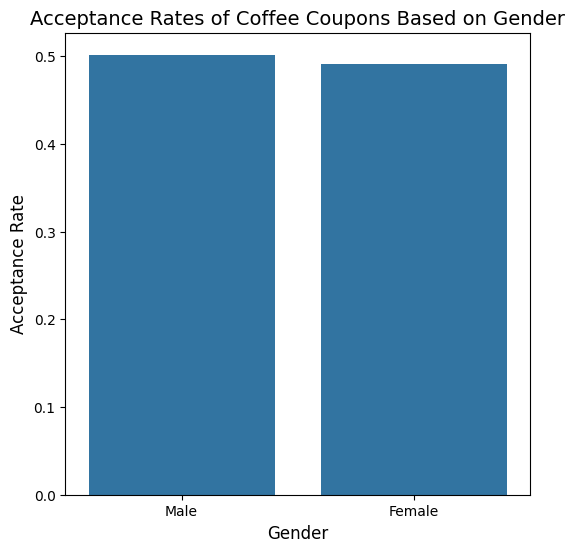

In [181]:
y = [male_acceptance, female_acceptance]
x = ['Male', 'Female']

plt.figure(figsize=(6, 6))
sns.barplot(x=x, y=y)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Acceptance Rate", fontsize=12)
plt.title("Acceptance Rates of Coffee Coupons Based on Gender", fontsize=14)

How did the amount of times the driver frequents coffee shops affect acceptance rates?

In [182]:
less1_never = ['less1', 'never'] # Used to query visits less than one
four_or_greater = ['4~8', 'gt8'] # Used to query visits four or greater

less_than_one = coffee_house.query('CoffeeHouse in @less1_never') # Query where visits are less than one
less_than_one_acceptance = less_than_one['Y'].mean() # Acceptance Rate
print(less_than_one_acceptance)

one_through_three = coffee_house.query('CoffeeHouse == "1~3"') # Query where visits are between 1-3
one_through_three_acceptance = one_through_three['Y'].mean() # Acceptance Rate
print(one_through_three_acceptance)

over_four = coffee_house.query('CoffeeHouse in @four_or_greater') # Query where visits are four or greater
over_four_acceptance = over_four['Y'].mean() # Acceptance Rate
print(over_four_acceptance)

0.34034907597535935
0.647693817468106
0.6725559481743227


Text(0.5, 1.0, 'Acceptance Rates of Coffee Coupons Based on Visits per Month')

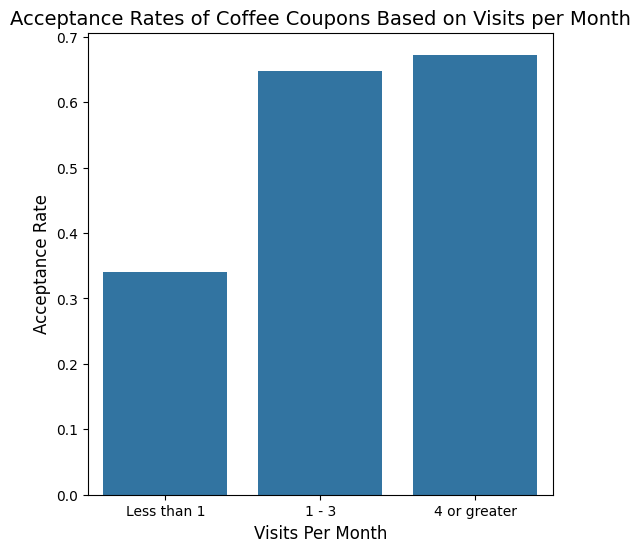

In [183]:
y = [less_than_one_acceptance, one_through_three_acceptance, over_four_acceptance]
x = ['Less than 1', '1 - 3', '4 or greater']

plt.figure(figsize=(6, 6))
sns.barplot(x=x, y=y)
plt.xlabel("Visits Per Month", fontsize=12)
plt.ylabel("Acceptance Rate", fontsize=12)
plt.title("Acceptance Rates of Coffee Coupons Based on Visits per Month", fontsize=14)

Based on the observations, we can see that coffee house coupons were offered the most. The acceptance rate for both male and female drivers were basically identical, with a slight edge towards male drivers. These coupons were mostly accepted by drivers with no urgent place to go, followed by those heading to work, and the least amount accepted by those headed home. The amount of times drivers frequented coffee houses in a month also had an effect on acceptance rate. Those who go less than once a month had the lowest acceptance rate, those who went 1-3 times were in the middle, and the highest acceptance rate was by those who visit 4 or more times a month.